### extract MBLD results for js

In [7]:
import pandas as pd
import numpy as np

# get all MBLD results from db
datestr = '240207'
Results = pd.read_csv(f'./WCA_export_Results_{datestr}.tsv', sep='\t')
mbldResults = Results[Results.eventId == "333mbf"]

In [8]:
vs = mbldResults.loc[mbldResults['best'] > -1, ['value1', 'value2', 'value3']] # only attempt columns
rs = pd.concat([vs['value1'], vs['value2'], vs['value3']]) # concatenate into one column
results = rs[rs > 0].tolist() # extract as list

In [9]:
import json

def sa(value): # get solved and attempted cubes from db value
    string = str(value)
    missed = int(string[-2:])
    difference = 99 - int(string[0:2])
    solved = difference + missed
    attempted = solved + missed
    return((solved, attempted))

tally = {}

for r in results:
    solved, attempted = sa(r)[0], sa(r)[1]
    score = solved*100 + attempted
    if score in tally:
        tally[score] += 1
    else:
        tally[score] = 1

print(tally)

with open(f'counts_{datestr}.js', 'w') as out_file:
    # json.dump(tally, out_file)
    out_file.writelines('const counts = ')
    out_file.writelines(str(tally))
    out_file.writelines(';')


{406: 435, 305: 465, 102: 869, 204: 620, 510: 139, 203: 1328, 404: 347, 202: 1144, 405: 493, 507: 334, 610: 201, 506: 345, 306: 380, 505: 275, 1010: 107, 708: 251, 303: 659, 407: 287, 304: 638, 1515: 48, 712: 68, 1111: 54, 408: 204, 811: 142, 709: 190, 606: 233, 1214: 49, 1112: 95, 607: 289, 608: 281, 914: 52, 707: 151, 809: 179, 609: 214, 508: 241, 808: 131, 909: 110, 1616: 22, 815: 51, 1517: 110, 911: 122, 1015: 78, 1118: 29, 1012: 123, 1617: 58, 814: 33, 711: 123, 509: 160, 1011: 129, 1217: 82, 710: 238, 1212: 44, 918: 12, 813: 99, 1216: 62, 1316: 69, 916: 42, 611: 65, 816: 22, 913: 123, 810: 229, 1013: 127, 1717: 19, 1213: 95, 1618: 46, 1318: 40, 713: 81, 1218: 34, 1418: 52, 1417: 125, 910: 182, 1919: 14, 1921: 50, 1317: 90, 1114: 55, 1315: 82, 2325: 33, 912: 121, 1116: 67, 1414: 24, 812: 109, 1115: 90, 1823: 26, 2023: 20, 1720: 36, 1825: 30, 1718: 23, 1619: 34, 1929: 6, 1113: 134, 612: 44, 1215: 101, 2629: 17, 2129: 10, 1925: 44, 1524: 5, 1014: 46, 1313: 37, 1926: 11, 2532: 5, 212

In [10]:
# count of counts
print(str(tally))

cntcnts = {v: 0 for v in tally.values()}
for v in tally.values():
    cntcnts[v] += 1
print(tally[1820])

for k in sorted(cntcnts.keys())[24:]:
    print(k, cntcnts[k])

{406: 435, 305: 465, 102: 869, 204: 620, 510: 139, 203: 1328, 404: 347, 202: 1144, 405: 493, 507: 334, 610: 201, 506: 345, 306: 380, 505: 275, 1010: 107, 708: 251, 303: 659, 407: 287, 304: 638, 1515: 48, 712: 68, 1111: 54, 408: 204, 811: 142, 709: 190, 606: 233, 1214: 49, 1112: 95, 607: 289, 608: 281, 914: 52, 707: 151, 809: 179, 609: 214, 508: 241, 808: 131, 909: 110, 1616: 22, 815: 51, 1517: 110, 911: 122, 1015: 78, 1118: 29, 1012: 123, 1617: 58, 814: 33, 711: 123, 509: 160, 1011: 129, 1217: 82, 710: 238, 1212: 44, 918: 12, 813: 99, 1216: 62, 1316: 69, 916: 42, 611: 65, 816: 22, 913: 123, 810: 229, 1013: 127, 1717: 19, 1213: 95, 1618: 46, 1318: 40, 713: 81, 1218: 34, 1418: 52, 1417: 125, 910: 182, 1919: 14, 1921: 50, 1317: 90, 1114: 55, 1315: 82, 2325: 33, 912: 121, 1116: 67, 1414: 24, 812: 109, 1115: 90, 1823: 26, 2023: 20, 1720: 36, 1825: 30, 1718: 23, 1619: 34, 1929: 6, 1113: 134, 612: 44, 1215: 101, 2629: 17, 2129: 10, 1925: 44, 1524: 5, 1014: 46, 1313: 37, 1926: 11, 2532: 5, 212

### pyplot version - solved/attempted

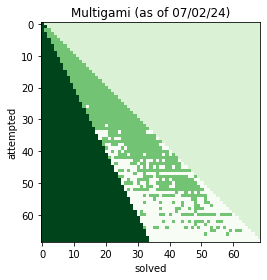

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from math import log10, floor

lim = 68 # grid size
grid = np.zeros((lim+1, lim+1))

for r in results:
    solved, attempted = sa(r)[0], sa(r)[1]
    if attempted <= lim:
        grid[attempted][solved] = 3 # result that has been acheived


for m in range(lim+1):
    for n in range(lim+1):
        if m > n+n: 
            grid[m][n] = 6 # DNF results
        if n > m:
            grid[m][n] = 1 # unobtainable results

# manually set 0/0 and 1/1
grid[0][0] = 6
grid[1][1] = 6
    
# plot heatmap
fig, ax = plt.subplots()
ax.imshow(grid, cmap='Greens', interpolation='nearest')
ax.set_xlabel("solved")
ax.set_ylabel("attempted")
ax.set_title(f"Multigami (as of {datestr[-2:]}/{datestr[2:4]}/{datestr[:2]})")
fig.tight_layout()
plt.savefig('grid.png', dpi=500)

### alternative version - points/DNFs

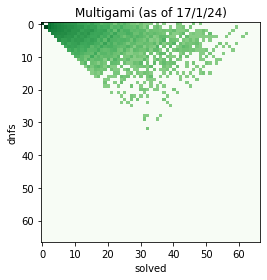

In [12]:
import matplotlib.pyplot as ax
import numpy as np
from math import log10, floor

def mbld_result(value):
    string = str(value)
    missed = int(string[-2:])
    total_seconds = int(string[2:7])
    difference = 99 - int(string[0:2])
    solved = difference + missed
    attempted = solved + missed
    minutes = total_seconds//60
    seconds = total_seconds%60
    return(f"{solved}/{attempted} {minutes}:{seconds :02d}")


def sa(value): # get solved and attempted cubes from db value
    string = str(value)
    missed = int(string[-2:])
    difference = 99 - int(string[0:2])
    solved = difference + missed
    attempted = solved + missed
    return((solved, attempted))

def pd(value): # get points and dnfs from db value
    string = str(value)
    missed = int(string[-2:])
    difference = 99 - int(string[0:2])
    solved = difference + missed
    attempted = solved + missed

    dnfs = attempted - solved
    points = solved - dnfs
    return((points, missed))


lim = 66 # grid size
grid = np.zeros((lim+1, lim+1))

for r in results:
    s, a = sa(r)[0], sa(r)[1]
    
    p, d = pd(r)[0], pd(r)[1]
    # if attempted <= lim:

    
    x = s
    y = d
    # if s<lim:
    #     if a<lim:
    #         grid[a][s] = 2
    #     if p<lim:
    #         grid[p][s] = 6
    if x<lim and y<lim:
        grid[y][x] += 3 # result that has been acheived


for m in range(lim+1):
    for n in range(lim+1):
        if grid[m][n] > 0:
            grid[m][n] = log10(grid[m][n])+3
        
        # if m > n:
        #     grid[m][n] = 7.8
        # if m > n: 
        #     grid[m][n] = 7.8 # DNF results
        # if n > m+m:
        #     grid[m][n] = 1 # unobtainable results

#manually set 0/0 and 1/1
grid[0][0] = 7.8
grid[1][1] = 7.8
    
# plot heatmap
fig, ax = plt.subplots()
ax.imshow(grid, cmap='Greens', interpolation='nearest')
ax.set_xlabel("solved")
ax.set_ylabel("dnfs")
ax.set_title("Multigami (as of 17/1/24)")
fig.tight_layout()
plt.savefig('grid.png', dpi=500)


In [75]:
myAttempts = ['1/3',
'1/4',
'0/2',
'2/3',
'3/4',
'5/6',
'5/5',
'5/8',
'7/7',
'6/9',
'8/9',
'3/6',
'3/11',
'7/9',
'9/10',
'5/11',
'9/11',
'8/12',
'9/12',
'7/12',
'9/11',
'8/11',
'5/11',
'7/8',
'8/12',
'8/13',
'10/12',
'7/13',
'12/16',
'8/14',
'10/15',
'11/15',
'11/14',
'7/15',
'9/16',
'10/15',
'9/14',
'9/14',
'13/16',
'11/14',
'14/16',
'14/17',
'12/17',
'14/17',
'15/17',
'14/17',
'12/19',
'14/19',
'12/19',
'8/18',
'16/17',
'13/18',
'13/17',
'16/17',
'14/20',
'16/19',
'14/19',
'15/20',
'16/20',
'15/20',
'18/20',
'13/20',
'18/21',
'9/21',
'18/20',
'18/25']

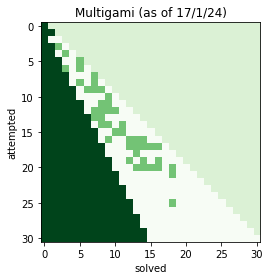

In [76]:
import matplotlib.pyplot as ax
import numpy as np
from math import log10, floor

def sa(value): # get solved and attempted cubes from db value
    string = str(value)
    missed = int(string[-2:])
    difference = 99 - int(string[0:2])
    solved = difference + missed
    attempted = solved + missed
    return((solved, attempted))


lim = 30 # grid size
grid = np.zeros((lim+1, lim+1))

def mySA(s):
    mn = s.split('/')
    return([int(mn[0]), int(mn[1])])

for r in myAttempts:
    mysa = mySA(r)
    solved, attempted = mysa[0], mysa[1]
    if attempted <= lim:
        grid[attempted][solved] = 3 # result that has been acheived


for m in range(lim+1):
    for n in range(lim+1):
        if m > n+n: 
            grid[m][n] = 6 # DNF results
        if n > m:
            grid[m][n] = 1 # unobtainable results

# manually set 0/0 and 1/1
grid[0][0] = 6
grid[1][1] = 6
    
# plot heatmap
fig, ax = plt.subplots()
ax.imshow(grid, cmap='Greens', interpolation='nearest')
ax.set_xlabel("solved")
ax.set_ylabel("attempted")
ax.set_title("Multigami (as of 17/1/24)")
fig.tight_layout()
plt.savefig('grid.png', dpi=500)